In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news.csv


In [8]:
!ls

news.csv  sample_data


In [28]:
df = pd.read_csv('news.csv', encoding = "ISO-8859-1")

In [29]:
df['text'] = df['title'] + ' ' + df['text']

In [30]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,You Can Smell Hillaryâs Fear Daniel Greenfie...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,Kerry to go to Paris in gesture of sympathy U....,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,875,The Battle of New York: Why This Primary Matters,The Battle of New York: Why This Primary Matte...,REAL


In [31]:
df.drop(columns =['Unnamed: 0', 'title'], inplace=True)

In [32]:
df['label'] = df['label'].map({'REAL':0, 'FAKE': 1})

In [33]:
Y = df['label'].values
X = df['text']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33)

In [35]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [36]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('# of tokens:', V)

# of tokens: 84690


In [37]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]
data_train.shape

(4947, 20174)

In [38]:
data_test = pad_sequences(sequences_test, maxlen =T)
data_test.shape

(2438, 20174)

In [43]:
D = 20

M = 15

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)

In [44]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)
r = model.fit(
    data_train, Y_train,
    epochs=10, batch_size= 128,
    validation_data = (data_test, Y_test)
)

Epoch 1/10
39/39 [==============================] - 36s 936ms/step - loss: 0.6899 - accuracy: 0.5694 - val_loss: 0.6820 - val_accuracy: 0.8121
Epoch 2/10
39/39 [==============================] - 36s 929ms/step - loss: 0.6222 - accuracy: 0.8856 - val_loss: 0.5236 - val_accuracy: 0.8753
Epoch 3/10
39/39 [==============================] - 36s 931ms/step - loss: 0.4159 - accuracy: 0.9200 - val_loss: 0.3410 - val_accuracy: 0.9151
Epoch 4/10
39/39 [==============================] - 37s 937ms/step - loss: 0.4185 - accuracy: 0.8541 - val_loss: 0.3146 - val_accuracy: 0.9167
Epoch 5/10
39/39 [==============================] - 37s 939ms/step - loss: 0.4396 - accuracy: 0.8824 - val_loss: 0.3965 - val_accuracy: 0.9225
Epoch 6/10
39/39 [==============================] - 36s 925ms/step - loss: 0.3073 - accuracy: 0.9610 - val_loss: 0.3071 - val_accuracy: 0.9323
Epoch 7/10
39/39 [==============================] - 36s 927ms/step - loss: 0.2309 - accuracy: 0.9671 - val_loss: 0.2724 - val_accuracy: 0.9204

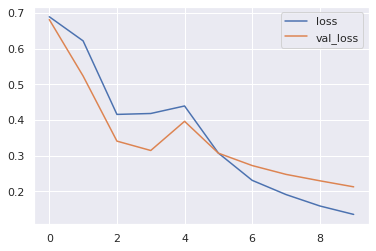

In [45]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

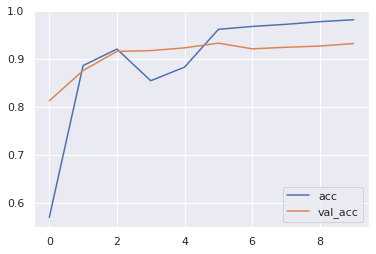

In [46]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()